# homework
**Questions to answer:**
==
    1) What do you notice about the data? Any issues?
    2) What is the overall survival rate?
    3) What role does gender play in surviving?
    4) What role does class play in surviving?
    5) What role does age play in surviving?
    6) Given the above, do you have any guesses on what predicts survival?
    7) Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?



In [97]:
# load packages
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from operator import truediv

In [65]:
# Load data and get summary statistics
titanic_data = pd.read_csv('/Users/Alexanderhubbard/Documents/DAT-NYC-30/homework/hw1/titanic_dropna.csv', index_col=0)
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


**Question #1:**
==
1) What do you notice about the data? Any issues?
 - I think its curious that a handful of people payed nothing for their fare.

In [66]:
titanic_data[titanic_data['Fare'] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,NaN,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38,0,0,19972,0,NaN,S


**Question #1:**
==
1) What do you notice about the data? Any issues?
 - It was not immediately apparent what 'SibSp' and 'Parch' were.
  - After a google search: 'sibsp Number of Siblings/Spouses Aboardparch Number of Parents/Children Aboard'

**Question #2:**
==
2) What is the overall survival rate?
 - The overall survival rate (i.e. survivors ÷ total passengers) was: 40%

In [99]:
# what is the overall survival rate?
survivors = sum(titanic_data['Survived'])
total_pass = len(titanic_data)
survival_rate = (survivors / total_pass) * 100

print "The total number of survivors was: %d" % survivors
print "The total number of passengers on the titanic was: %d" % total_pass
print "The survival rate (i.e. survivors ÷ total passengers) was: %d%%" % survival_rate

The total number of survivors was: 288
The total number of passengers on the titanic was: 712
The survival rate (i.e. survivors ÷ total passengers) was: 40%


**Questions #3:**
==
3) What role does gender play in surviving?
 - Gender played a large role in survival
 
  
**For females:**
 - Female passengers comprised 36% of total passengers
 - Female survivors comprised 68% of total survivers
 - The female survival rate among females was 75%
   - For every 100 female passengers 75 females survived
 
**For males:**
 - Male passengers comprised 64% of total passengers
 - Male survivors comprised 32% of total survivers
 - The male survival rate among males was 21%
   - For every 100 male passengers only 21 males survived

**Overall stat:**
 - There were 110% more women survivers then male survivors



In [103]:
# What role does gender play in surviving?
total_survivors = sum(titanic_data['Survived'])
total_w_survivors = sum(titanic_data['Survived'][(titanic_data['Sex'] == "female")])
total_m_survivors = sum(titanic_data.Survived[(titanic_data.Sex == "male")])
total_w_pass = len(titanic_data[(titanic_data['Sex'] == "female")])
total_m_pass = len(titanic_data[(titanic_data['Sex'] == "male")])
percent_w_pass = round((total_w_pass / total_pass) * 100)
percent_m_pass = round((total_m_pass / total_pass) * 100)
survival_rate_w = round((total_w_survivors / total_pass) * 100)
survival_rate_m = round((total_m_survivors / total_pass) * 100)
survival_rate_w_to_survivors = round((total_w_survivors / total_survivors) * 100)
survival_rate_m_to_survivors = round((total_m_survivors / total_survivors) * 100)
survival_rate_w_to_w = round((total_w_survivors / total_w_pass) * 100)
survival_rate_m_to_m = round((total_m_survivors / total_m_pass) * 100)

print "Total number of female passengers was: %d" % total_w_pass
print "Female passengers made up %d%% of total passengers" % percent_w_pass
print "Total number of females that survived out of total passengers was: %d" % total_w_survivors
print "Percent of females that survived out of total passengers was: %d%%" % survival_rate_w
print "Percent of females that survived out of total survivors was: %d%%" % survival_rate_w_to_survivors
print "Total percent of females that survived compared to total female passengers was: %d%%" % survival_rate_w_to_w
print "\nTotal number of male passengers was: %d" % total_m_pass
print "Male passengers made up %d%% of total passengers" % percent_m_pass
print "Total number of males that survived was: %d" % total_m_survivors
print "Percent of males that survived out of total passengers was: %d%%" % survival_rate_m
print "Percent of males that survived out of total survivors was: %d%%" % survival_rate_m_to_survivors
print "Percent of males that survived compared to total male passengers was: %d%%" % survival_rate_m_to_m
print """\nThere were %d%% more women survivers then male survivors
        (total female (survivors ÷ total male survivors) -100%%)""" % round(((total_w_survivors / total_m_survivors)-1) * 100)

Total number of female passengers was: 259
Female passengers made up 36% of total passengers
Total number of females that survived out of total passengers was: 195
Percent of females that survived out of total passengers was: 27%
Percent of females that survived out of total survivors was: 68%
Total percent of females that survived compared to total female passengers was: 75%

Total number of male passengers was: 453
Male passengers made up 64% of total passengers
Total number of males that survived was: 93
Percent of males that survived out of total passengers was: 13%
Percent of males that survived out of total survivors was: 32%
Percent of males that survived compared to total male passengers was: 21%

There were 110% more women survivers then male survivors
        (total female (survivors ÷ total male survivors) -100%)


**To better understand how many more females survived then males a plot of total survivors by gender is shown below:** 
==

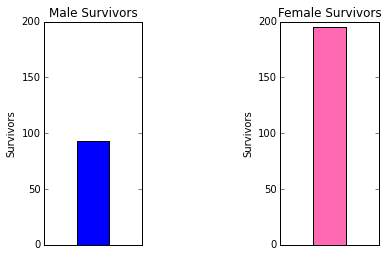

In [200]:
# plot male and female survivors
plt.subplot(1,3,1)
titanic_data['Survived'][(titanic_data['Survived'] == 1) & 
                         (titanic_data['Sex'] == "male")].plot(kind='hist', color=['Blue'],
                                                              xlim=(.9, 1.2),
                                                              ylim=(0, 200))
plt.title('Male Survivors')
plt.ylabel("Survivors")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off


plt.subplot(1,3,3)
titanic_data['Survived'][(titanic_data['Survived'] == 1) & 
                         (titanic_data['Sex'] == "female")].plot(kind='hist', color=['HotPink'],
                                                                xlim=(.9, 1.2),
                                                                ylim=(0, 200))
plt.title('Female Survivors')
plt.ylabel("Survivors")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off'); # labels along the bottom edge are off

**Questions #4:**
==
4) What role does class play in surviving?
 - The higher class passengers were more likely to survive
   - I.e. 1st class was more likely to survive than 3rd class
 - To safegaurd against a population bias I generated survival rates by comparing survivors to thier class population rather than the overall passenger population population.

**First Class**
- Total percent of first class passengers that survived compared to all first class was: 65%
 - i.e. total first class pasangers was 184, and total first class survivors was 120

**Second Class**
- Total percent of second class passengers that survived compared to all second class was: 47%
 - i.e. total second class pasangers was 173, and total second class survivors was 83

**Second Class**
- Total percent of third class passengers that survived compared to all third class was: 11%
 - i.e. total third class pasangers was 355, and total third class survivors was 85

In [104]:
## What role does class play in surviving?
# calculate total passengers by class
# calculate total survivors by class
total_fc_survivors = sum(titanic_data.Survived[(titanic_data.Pclass == 1)])
total_sc_survivors = sum(titanic_data.Survived[(titanic_data.Pclass == 2)])
total_tc_survivors = sum(titanic_data.Survived[(titanic_data.Pclass == 3)])
total_fc_pass = len(titanic_data[(titanic_data.Pclass == 1)])
total_sc_pass = len(titanic_data[(titanic_data.Pclass == 2)])
total_tc_pass = len(titanic_data[(titanic_data.Pclass == 3)])
survival_rate_fc = (total_fc_survivors / total_pass) * 100
survival_rate_sc = (total_sc_survivors / total_pass) * 100
survival_rate_tc = (total_tc_survivors / total_pass) * 100
survival_rate_fc_to_fc = (total_fc_survivors / total_fc_pass) * 100
survival_rate_sc_to_sc = (total_sc_survivors / total_sc_pass) * 100
survival_rate_tc_to_tc = (total_tc_survivors / total_tc_pass) * 100


# print facts for each survivol rate by each class
print "Total number of first class passengers was: %d" % total_fc_pass
print "Total number of first class passengers that survived was: %d" % total_fc_survivors
print "Percent of first class passengers that survived out of first class was: %d%%" % survival_rate_fc_to_fc
print "Percent of first class passengers that survived out of total passengers was: %d%%" % survival_rate_fc
print "\nTotal number of second class passengers was: %d" % total_sc_pass
print "Total number of second class passengers that survived was: %d" % total_sc_survivors
print "Percent of second class passengers that survived was: %d%%" % survival_rate_sc
print "Percent of first class passengers that survived compared to first class was: %d%%" % survival_rate_sc_to_sc
print "\nTotal number of third class passengers was: %d" % total_tc_pass
print "Total number of third class passengers that survived was: %d" % total_tc_survivors
print "Percent of third class passengers that survived was: %d%%" % survival_rate_tc
print "Percent of first class passengers that survived compared to first class was: %d%%" % survival_rate_tc_to_tc

Total number of first class passengers was: 184
Total number of first class passengers that survived was: 120
Percent of first class passengers that survived out of first class was: 65%
Percent of first class passengers that survived out of total passengers was: 16%

Total number of second class passengers was: 173
Total number of second class passengers that survived was: 83
Percent of second class passengers that survived was: 11%
Percent of first class passengers that survived compared to first class was: 47%

Total number of third class passengers was: 355
Total number of third class passengers that survived was: 85
Percent of third class passengers that survived was: 11%
Percent of first class passengers that survived compared to first class was: 23%


**To better compare survivors by class look at the graphs shown below:** 
==

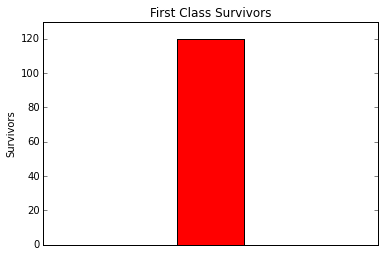

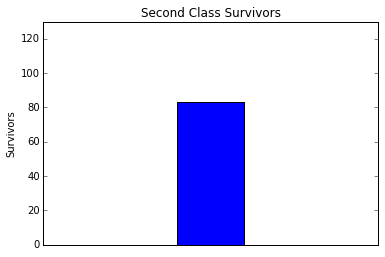

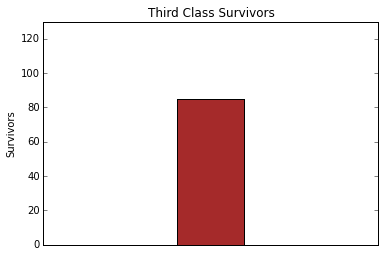

In [159]:
## plot survivors by class
# I figured out how to use subplot to show all three graphs
    # however, it distorted the portortions and degraded the visual comparison
    # the code is commented out
    
# graph first class survivors as red, remove ticks at the bottom
#plt.subplot(221)
titanic_data['Survived'][(titanic_data['Pclass'] == 1)].plot(kind='hist', color=['Red'],
                                                              xlim=(.7, 1.2),
                                                              ylim=(0,130))

plt.title('First Class Survivors')
plt.ylabel("Survivors")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.show()

# graph second class survivors as blue, remove ticks at the bottom
#plt.subplot(223)
titanic_data['Survived'][(titanic_data['Pclass'] == 2)].plot(kind='hist', color=['Blue'],
                                                              xlim=(.7, 1.2),
                                                              ylim=(0,130))

plt.title('Second Class Survivors')
plt.ylabel("Survivors")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off'); # labels along the bottom edge are off
plt.show()

# graph third class survivors as brown, remove ticks at the bottom
#plt.subplot(224)
titanic_data['Survived'][(titanic_data['Pclass'] == 3)].plot(kind='hist', color=['Brown'],
                                                              xlim=(.7, 1.2),
                                                              ylim=(0,130))

plt.title('Third Class Survivors')
plt.ylabel("Survivors")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.show()

**Questions #5:**
==
5) What role does age play in surviving?
- Age plays a role, but it is more apparent when observed by class
- The older people got the lower the survival rate gets
- By grouping data in 5 year incriments it is more apparent that the chance of survival decreases with age (shown below, before question 6)
- Around age 20 the survival rate becomes relatively constant  (shown below, before question 6)


In [72]:
# create a data frame with a list of ages to group by
age_list_range = pd.DataFrame(range(0,85,5), columns=['Age'])

## create containers to hold arrays od data
# overall data
age_totals_range = []
surv_by_age_range = []
w_age_totals_range = []
m_age_totals_range = []
w_surv_by_age_range = []
m_surv_by_age_range = []

# data grouped by class
age_totals_fc_range = []
surv_by_age_fc_range = []
age_totals_sc_range = []
surv_by_age_sc_range = []
age_totals_tc_range = []
surv_by_age_tc_range = []

# data grouped by class and gender
# female
age_totals_fc_w_range = []
surv_by_age_fc_w_range = []
age_totals_sc_w_range = []
surv_by_age_sc_w_range = []
age_totals_tc_w_range = []
surv_by_age_tc_w_range = []
# male
age_totals_fc_m_range = []
surv_by_age_fc_m_range = []
age_totals_sc_m_range = []
surv_by_age_sc_m_range = []
age_totals_tc_m_range = []
surv_by_age_tc_m_range = []


# the for loop creats a data frame of passegers and survivors for each age group
# it begins at 0 at creates a data from with people ages 0-4, then 5-9
for i in range(0, len(age_list_range['Age'])):
    # create a df with the age  of loop and everything above
    # e.g. if i = 1 then age coorosponding is 5, so collect data for people 5 and up
    x_range = titanic_data[titanic_data['Age'] >= age_list_range['Age'][i]]
    # if it is the last age then crate a df that equals that age
    if max(age_list_range['Age']) <= age_list_range['Age'][i]:
        x_range = x_range[x_range['Age'] == age_list_range['Age'][i]]
    else:
        # if it is not the last age remove ages that are less than next age group
        # e.g. if i = 1 then age coorosponding is 5 making the next group 10
        # therefore collect data for people that are younger than 10
        x_range = x_range[x_range['Age'] < age_list_range['Age'][i + 1]]
    # track gender by age
    x_w_range = x_range[x_range['Sex'] == 'female']
    x_m_range = x_range[x_range['Sex'] == 'male']
    # track class by age
    x_fc_range = x_range[x_range['Pclass'] == 1]
    x_sc_range = x_range[x_range['Pclass'] == 2]
    x_tc_range = x_range[x_range['Pclass'] == 3] 
    # track gender and class by age
    x_fc_w_range = x_w_range[x_w_range['Pclass'] == 1]
    x_sc_w_range = x_w_range[x_w_range['Pclass'] == 2]
    x_tc_w_range = x_w_range[x_w_range['Pclass'] == 3]
    x_fc_m_range = x_m_range[x_m_range['Pclass'] == 1]
    x_sc_m_range = x_m_range[x_m_range['Pclass'] == 2]
    x_tc_m_range = x_m_range[x_m_range['Pclass'] == 3]
    # count total passengers for overall pass, class, and age
    age_totals_range.append(len(x_range))
    w_age_totals_range.append(len(x_w_range))
    m_age_totals_range.append(len(x_m_range))
    age_totals_fc_range.append(len(x_fc_range))
    age_totals_sc_range.append(len(x_sc_range))
    age_totals_tc_range.append(len(x_tc_range))
    age_totals_fc_w_range.append(len(x_fc_w_range))
    age_totals_sc_w_range.append(len(x_sc_w_range))
    age_totals_tc_w_range.append(len(x_tc_w_range))
    age_totals_fc_m_range.append(len(x_fc_m_range))
    age_totals_sc_m_range.append(len(x_sc_m_range))
    age_totals_tc_m_range.append(len(x_tc_m_range))
    # track survivers by age
    surv_by_age_range.append(sum(x_range['Survived']))
    # gender survive by age
    w_surv_by_age_range.append(sum(x_w_range['Survived']))
    m_surv_by_age_range.append(sum(x_m_range['Survived']))
    # class survive by age
    surv_by_age_fc_range.append(sum(x_fc_range['Survived']))    
    surv_by_age_sc_range.append(sum(x_sc_range['Survived']))    
    surv_by_age_tc_range.append(sum(x_tc_range['Survived']))  
    # gender and class survive by age
    surv_by_age_fc_w_range.append(sum(x_fc_w_range['Survived']))
    surv_by_age_sc_w_range.append(sum(x_sc_w_range['Survived']))    
    surv_by_age_tc_w_range.append(sum(x_tc_w_range['Survived']))    
    surv_by_age_fc_m_range.append(sum(x_fc_m_range['Survived']))
    surv_by_age_sc_m_range.append(sum(x_sc_m_range['Survived']))
    surv_by_age_tc_m_range.append(sum(x_tc_m_range['Survived']))
    


In [73]:
# this section calculates the survival rate for each age group and splits them by class

# create a large df with every age
df_range = pd.DataFrame(age_list_range, columns = ['Age'])
df_range['total'] = age_totals_range
df_range['survivors'] = surv_by_age_range
df_range['female survivors'] = w_surv_by_age_range
df_range['male survivors'] = m_surv_by_age_range

# create a large df with every age for first class
df_fc_range = pd.DataFrame(age_list_range, columns = ['Age'])
df_fc_range['total'] = age_totals_fc_range
df_fc_range['survivors'] = surv_by_age_fc_range
df_fc_range['female survivors'] = surv_by_age_fc_w_range
df_fc_range['male survivors'] = surv_by_age_fc_m_range

# create a large df with every age for second class
df_sc_range = pd.DataFrame(age_list_range, columns = ['Age'])
df_sc_range['total'] = age_totals_sc_range
df_sc_range['survivors'] = surv_by_age_sc_range
df_sc_range['female survivors'] = surv_by_age_sc_w_range
df_sc_range['male survivors'] = surv_by_age_sc_m_range

# create a large df with every age for third class
df_tc_range = pd.DataFrame(age_list_range, columns = ['Age'])
df_tc_range['total'] = age_totals_tc_range
df_tc_range['survivors'] = surv_by_age_tc_range
df_tc_range['female survivors'] = surv_by_age_tc_w_range
df_tc_range['male survivors'] = surv_by_age_tc_m_range

perce_surv_age_range = pd.DataFrame(age_list_range, columns = ['Age'])
perce_surv_age_range['overall percent'] = pd.DataFrame(np.true_divide(surv_by_age_range, age_totals_range)) *100
perce_surv_age_range['female percent'] = pd.DataFrame(np.true_divide(w_surv_by_age_range, w_age_totals_range)) *100
perce_surv_age_range['male percent'] = pd.DataFrame(np.true_divide(m_surv_by_age_range, m_age_totals_range)) *100
perce_surv_age_range[perce_surv_age_range == np.inf] = 0
perce_surv_age_range = perce_surv_age_range.fillna(0)
perce_surv_age_range = perce_surv_age_range.set_index(['Age'])

perce_surv_age_fc_range = pd.DataFrame(age_list_range, columns = ['Age'])
perce_surv_age_fc_range['overall percent'] = pd.DataFrame(np.true_divide(surv_by_age_fc_range, age_totals_fc_range)) *100
perce_surv_age_fc_range['female percent'] = pd.DataFrame(np.true_divide(surv_by_age_fc_w_range, age_totals_fc_w_range)) *100
perce_surv_age_fc_range['male percent'] = pd.DataFrame(np.true_divide(surv_by_age_fc_m_range, age_totals_fc_m_range)) *100
perce_surv_age_fc_range[perce_surv_age_fc_range == np.inf] = 0
perce_surv_age_fc_range = perce_surv_age_fc_range.fillna(0)
perce_surv_age_fc_range = perce_surv_age_fc_range.set_index(['Age'])

perce_surv_age_sc_range = pd.DataFrame(age_list_range, columns = ['Age'])
perce_surv_age_sc_range['overall percent'] = pd.DataFrame(np.true_divide(surv_by_age_sc_range, age_totals_sc_range)) *100
perce_surv_age_sc_range['female percent'] = pd.DataFrame(np.true_divide(surv_by_age_sc_w_range, age_totals_sc_w_range)) *100
perce_surv_age_sc_range['male percent'] = pd.DataFrame(np.true_divide(surv_by_age_sc_m_range, age_totals_sc_m_range)) *100
perce_surv_age_sc_range[perce_surv_age_sc_range == np.inf] = 0
perce_surv_age_sc_range = perce_surv_age_sc_range.fillna(0)
perce_surv_age_sc_range = perce_surv_age_sc_range.set_index(['Age'])

perce_surv_age_tc_range = pd.DataFrame(age_list_range, columns = ['Age'])
perce_surv_age_tc_range['overall percent'] = pd.DataFrame(np.true_divide(surv_by_age_tc_range, age_totals_tc_range)) *100
perce_surv_age_tc_range['female percent'] = pd.DataFrame(np.true_divide(surv_by_age_tc_w_range, age_totals_tc_w_range)) *100
perce_surv_age_tc_range['male percent'] = pd.DataFrame(np.true_divide(surv_by_age_tc_m_range, age_totals_tc_m_range)) *100
perce_surv_age_tc_range[perce_surv_age_tc_range == np.inf] = 0
perce_surv_age_tc_range = perce_surv_age_tc_range.fillna(0)
perce_surv_age_tc_range = perce_surv_age_tc_range.set_index(['Age'])

df_index_range = df_range.set_index(['Age'])
df_index_fc_range = df_fc_range.set_index(['Age'])
df_index_sc_range = df_sc_range.set_index(['Age'])
df_index_tc_range = df_tc_range.set_index(['Age'])

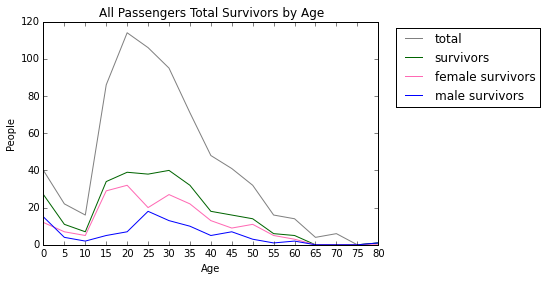

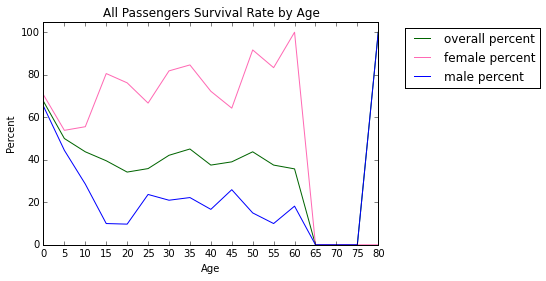

In [79]:
# plot all passengares survival by age
df_index_range.plot(color=['Grey', 'DarkGreen', 'HotPink', 'Blue'])
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('People')
plt.title('All Passengers Total Survivors by Age')
plt.xticks(np.arange(0, 85, 5.0));

# plot all passengares survival by age
perce_surv_age_range.plot(color=['DarkGreen', 'HotPink', 'Blue'], ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Percent')
plt.title('All Passengers Survival Rate by Age')
plt.xticks(np.arange(0, 85, 5.0));

**As age increases the survival rate decreases**
==
**At age 20 the survival rate remains relatively constant**
==

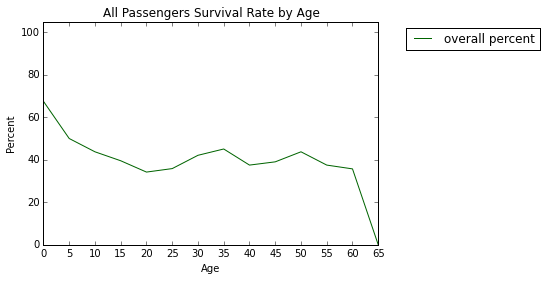

In [199]:
# plot all passengares survival by age
# exclude age over 65 because there is only 1 person over 65 and they survived
# the trendline shows that they are declining
perce_surv_age_range['overall percent'].plot(color='DarkGreen', ylim=(0, 105), xlim=(0, 65))
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Percent')
plt.title('All Passengers Survival Rate by Age')
plt.xticks(np.arange(0, 70, 5.0));

**Questions #6:**
==

6) Given the above, do you have any guesses on what predicts survival?
 - The combination of gender by class and age.
 - Women in second class cabins had the best survival rate
  - The survival rate for second class women is nearly the same as the survival rate for all second class passengers
 - Survival for females takes a sharp decline betweeen the ages of 25 and 30
   - This occurs because first and third class female's survival rate drops, whereas first and third class male's survival rate spikes
   - These data points sticks out when observing the data by survival percent rather than total survivors

**Survivors by Age, Class, and Gender**
==
**Raw number of survivors shown below**
==

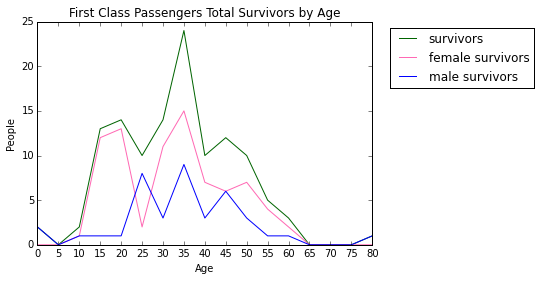

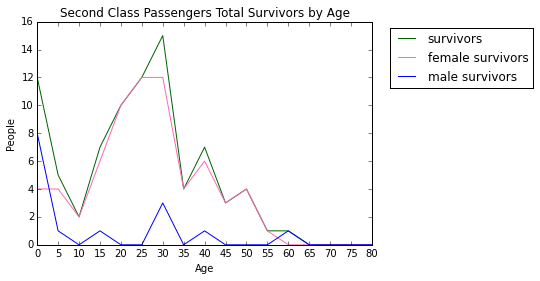

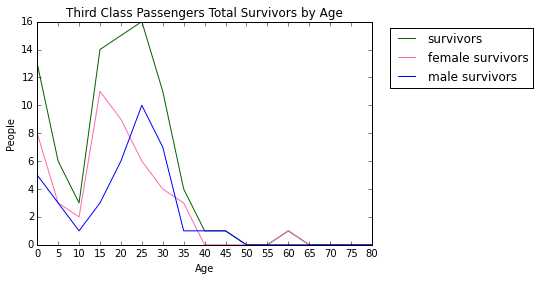

In [83]:
df_index_fc_range_drop = df_index_fc_range.drop(['total'], 1)

df_index_fc_range_drop.plot(color=['DarkGreen', 'HotPink', 'Blue'])
#plt.legend(loc = 'upper right')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('People')
plt.title('First Class Passengers Total Survivors by Age')
plt.xticks(np.arange(0, 85, 5.0));

# plot second class passengares survival by age
df_index_sc_range_drop = df_index_sc_range.drop(['total'], 1)
df_index_sc_range_drop.plot(color=['DarkGreen', 'HotPink', 'Blue'])
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('People')
plt.title('Second Class Passengers Total Survivors by Age')
plt.xticks(np.arange(0, 85, 5.0));

# plot third class passengares survival by age
df_index_tc_range_drop = df_index_tc_range.drop(['total'], 1)
df_index_tc_range_drop.plot(color=['DarkGreen', 'HotPink', 'Blue'])
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('People')
plt.title('Third Class Passengers Total Survivors by Age')
plt.xticks(np.arange(0, 85, 5.0));

plt.show()

**Survivors by Age, Class, and Gender**
==
**Percent of survivors shown below**
==

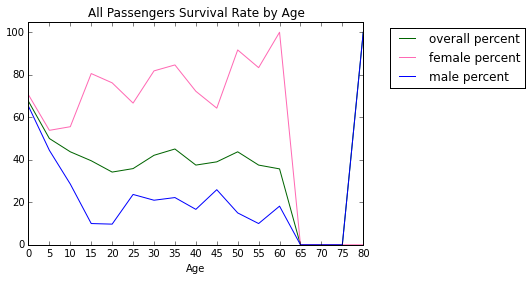

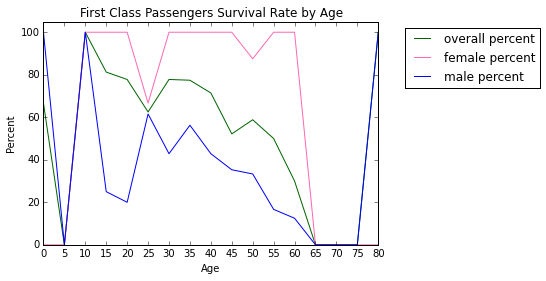

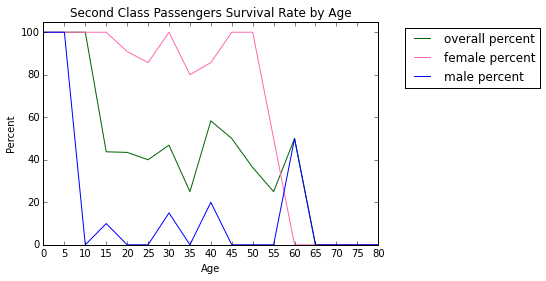

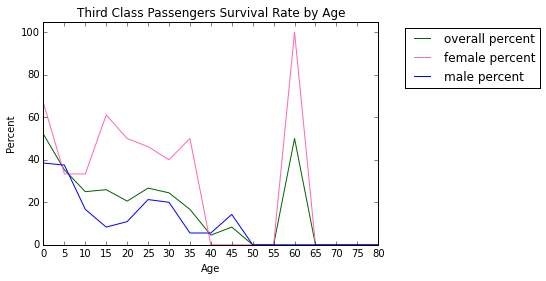

In [93]:
# plot all passengares survival by age
perce_surv_age_range.plot(color=['DarkGreen', 'HotPink', 'Blue'], ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title('All Passengers Survival Rate by Age')
plt.xticks(np.arange(0, 85, 5.0));

# plot first class passengares survival by age
perce_surv_age_fc_range.plot(color=['DarkGreen', 'HotPink', 'Blue'], ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Percent')
plt.title('First Class Passengers Survival Rate by Age')
plt.xticks(np.arange(0, 85, 5.0));

# plot second class passengares survival by age
perce_surv_age_sc_range.plot(color=['DarkGreen', 'HotPink', 'Blue'], ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Percent')
plt.title('Second Class Passengers Survival Rate by Age')
plt.xticks(np.arange(0, 85, 5.0));

# plot third class passengares survival by age
perce_surv_age_tc_range.plot(color=['DarkGreen', 'HotPink', 'Blue'], ylim=(0, 105))
#plt.legend(loc = 'upper')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Percent')
plt.title('Third Class Passengers Survival Rate by Age')
plt.xticks(np.arange(0, 85, 5.0));

plt.show()

**Questions #7:**
==
Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?
 - I think we could build a model to calculate the probability of survival based on the the passenger's age, gender, and class
 - I.e. a female between 30 and 34 in a second class cabin would have a 100% chance of survival, whereas a male between the age of 30 and 34 in a second class cabin would have a 15% chance of survival (see output below)
 - The output below could be perfect to calculate specific ages rather than a range of ages. 
    
    

In [96]:
perce_surv_age_sc_range.loc[30]

overall percent     46.875
female percent     100.000
male percent        15.000
Name: 30, dtype: float64